In [1]:
ls ~/Experiments/infrastructure/

ethiopia-population-by-year-for-three-cities-with-locations.csv


In [1]:
from os.path import expanduser, join

source_folder = expanduser('~/Experiments/infrastructure/')
source_node_path = join(source_folder, 'et')
/home/rhh/Experiments/infrastructure

# source_node_path = expanduser('~/Projects/networker/data/max_100.csv')
# source_network_path
target_network_folder = '/tmp/networker'

In [2]:
cfg = {
    'demand_nodes': {
        'filename': source_node_path,
        'x_column': 'X',
        'y_column': 'Y', 
        'budget_column': 'mvmax',
    },
    'network_algorithm': 'mod_boruvka',
    'network_parameters': {
        'minimum_node_count': 2,
    }
}

In [3]:
from networker.networker_runner import NetworkerRunner
nwk = NetworkerRunner(cfg, target_network_folder)
nwk.validate()
nwk.run()

Couldn't import dot_parser, loading of dot files will not be possible.


2016-04-05 21:08:23,518 - networker - INFO - building network
2016-04-05 21:08:23,519 - networker - INFO - running mod_boruvka on 100 demand nodes and 100 total nodes
2016-04-05 21:08:24,927 - networker - INFO - filtered result has 99 nodes and 98 edges
2016-04-05 21:08:24,929 - networker - INFO - writing output


In [4]:
from os.path import join
from sequencer import NetworkPlan
from sequencer.Models import EnergyMaximizeReturn

# source_folder = expanduser('~/Projects/sequencer/data/sumaila/input')
# csv = join(source_folder, 'metrics-local.csv')
# shp = join(source_folder, 'networks-proposed.shp')
csv = source_node_path
shp = join(target_network_folder, 'edges.shp')
nwp = NetworkPlan(shp, csv, prioritize='Population')
model = EnergyMaximizeReturn(nwp)
results = model.sequence()

2016-04-05 21:08:26,481 - sequencer - INFO - Aligning Network Nodes With Input Metrics
/home/rhh/Projects/sequencer/sequencer/Utils.py:52: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  metrics = pd.merge(metrics, node_df, on='m_coords', left_index=True).sort()
/home/rhh/Projects/sequencer/sequencer/Utils.py:67: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  metrics = pd.concat([closest_match, fake_nodes]).sort()
2016-04-05 21:08:26,657 - sequencer - INFO - Computing Pairwise Distances
2016-04-05 21:08:26,659 - sequencer - INFO - Using haversine Distance
2016-04-05 21:08:26,674 - sequencer - INFO - Directing Network Away From Roots
2016-04-05 21:08:26,690 - sequencer - INFO - Directing SUBGRAPH 1 / 1
/home/rhh/Projects/sequencer/sequencer/NetworkPlan.py:163: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  non_positional = self.metrics[self.metrics.columns - ['X', 'Y', 'coords', 'm_coords']].ix[nodes

KeyError: 'Population'

In [ ]:
debug

> /home/rhh/Projects/infrastructure-planning/experiments/pandas/hashtable.pyx(676)pandas.hashtable.PyObjectHashTable.get_item (pandas/hashtable.c:12216)()

ipdb> up
> /usr/lib64/python2.7/site-packages/pandas/core/index.py(1759)get_loc()
   1757                                  'backfill or nearest lookups')
   1758             key = _values_from_object(key)
-> 1759             return self._engine.get_loc(key)
   1760 
   1761         indexer = self.get_indexer([key], method=method,

ipdb> up
> /usr/lib64/python2.7/site-packages/pandas/core/internals.py(3211)get()
   3209 
   3210             if not isnull(item):
-> 3211                 loc = self.items.get_loc(item)
   3212             else:
   3213                 indexer = np.arange(len(self.items))[isnull(self.items)]

ipdb> u
<function u at 0x7fedd5447cf8>
ipdb> up
> /usr/lib64/python2.7/site-packages/pandas/core/generic.py(1091)_get_item_cache()
   1089         res = cache.get(item)
   1090         if res is None:
-> 1091        

In [5]:
from invisibleroads_macros.disk import make_folder

target_sequence_folder = make_folder('/tmp/sequencer')
model.output(target_folder)

NameError: name 'target_folder' is not defined

In [3]:
from os.path import expanduser

geometry1_path = expanduser('~/Projects/sequencer/data/sumaila/input/networks-proposed.shp')
geometry2_path = '/tmp/networker/edges.shp'
geometry3_path = '/tmp/networker/nodes.shp'

In [4]:
from geometryIO import load
a, b, c, d = load(geometry1_path)
print a
print b[:2]
print c[:2]
print d

+proj=longlat +datum=WGS84 +no_defs 
[<shapely.geometry.linestring.LineString object at 0x7f75a654e990>, <shapely.geometry.linestring.LineString object at 0x7f75a654ea90>]
[(0,), (1,)]
[('FID', 12)]


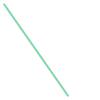

In [5]:
b[0]

In [6]:
from geometryIO import load
a, b, c, d = load(geometry2_path)
print a
print b[:2]
print c[:2]
print d

GeometryError: Could not load edges.shp

In [32]:
from geometryIO import load
a, b, c, d = load(geometry3_path)
print a
print b[:2]
print c[:2]
print d

+proj=longlat +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +no_defs 
[<shapely.geometry.point.Point object at 0x7f5ec7cf7890>, <shapely.geometry.point.Point object at 0x7f5ec7cf7a10>]
[(0,), (1,)]
[('FID', 12)]
